In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pprint

In [3]:
# read in eligible girl groups list
with open ('eligible_girl_groups', 'rb') as fp:
    eligible_girl_groups = pickle.load(fp)

In [4]:
# create empty list to store search query results
kprofiles_name = []
spotify_name = []
uri = []
spotify_url = []
genres = []
popularity = []
followers = []

# get data for each girl group
for group_name in eligible_girl_groups:
    result = sp.search(q=group_name, type='artist', limit=1)
    search_result = result['artists']['items'][0]  
    
    kprofiles_name.append(group_name)  # to be able to connect results to search query  
    spotify_name.append(search_result['name'])
    uri.append(search_result['uri'])
    spotify_url.append(search_result['external_urls']['spotify'])
    genres.append(search_result['genres'])
    popularity.append(search_result['popularity'])
    followers.append(search_result['followers']['total'])

In [5]:
# create data frame to store initial query results
raw_groups = pd.DataFrame({'kprofiles_name': kprofiles_name
                           , 'spotify_name': spotify_name
                           , 'uri': uri
                           , 'spotify_url': spotify_url
                           , 'genres': genres
                           , 'popularity': popularity
                           , 'followers': followers})

In [6]:
# identify groups that may not have been queried correctly 
mask = raw_groups['genres'].apply(lambda x: ('k-pop' not in x) and ('k-pop girl group' not in x))
mislabelled_groups = raw_groups[mask]

In [7]:
# mislabelled groups -- manually identified
mislabelled_group_names = [
    'ADYA'
    , 'ALICE'
    , 'ARTMS'
    , 'Black Swan'
    , 'Chic & Idle' 
    , 'Chic Angel'
    , 'CSR'
    , 'E:LFIN'
    , 'Episode'
    , 'Favorite'  # removed due to misclassified songs on profile
    , 'FLORIA'
    , 'Girls’ World'
    , 'HANA'
    , 'Hashtag'
    , 'Hi-L'
    , 'ICU'
    , 'LIMELIGHT'
    , 'MAVE:'
    , 'Nature'
    , 'PEACH A!'
    , 'PRIMROSE'
    , 'Red Mint'
    , 'Saturday'
    , 'SKYLE'
]

In [8]:
# remove groups from the dataset that have been misidentified
raw_groups = raw_groups[~raw_groups['kprofiles_name'].isin(mislabelled_group_names)]

In [9]:
# manually get the URI for the 24 mislabelled groups
mislabelled_group_uris = [
    'spotify:artist:4J4tJMuTHFBLuNE93GGvDW'  # ADYA
    , 'spotify:artist:1mgzY8CsK8lyJy96tT8bV5'  # ALICE
    , 'spotify:artist:10NiYZbV1kGr5cBygKTS5J'  # ARTMS -- reclassified as ODD EYE CIRCLE
    , 'spotify:artist:2ujaWf015QoP7x1u20Yq5G'  # BLACKSWAN
    , 'spotify:artist:2KSqkZwIlrah1TLuJ2tJFy'  # Chic & Idle 
    , 'spotify:artist:31jWPLicclDsGAJPWeLGjZ'  # Chicangel
    , 'spotify:artist:06MX3Ecb8PHyNFmq8irTWC'  # CSR
    , 'spotify:artist:6KFq8SLrD1zyR3axqXTbS6'  # E:LFIN
    , 'spotify:artist:6XAN0pPRqTQv4xZAdHNR6Y'  # Episode
    # , 'spotify:artist:3o0wQ9s18mlYobc9ZqOs8i'  # FAVORITE  -- removed due to misclassified songs on profile
    , 'spotify:artist:743lER7eaWyR8Ko5MIJJ4C'  # FLORIA
    , 'spotify:artist:2xHChw6zYP64TC5zSKQgkX'  # Girls’ World
    , 'spotify:artist:6vGQhoObaenS8iymDydzbd'  # HANA
    , 'spotify:artist:5kE19flLQaIXPwUMhARREK'  # HASHTAG -- most recent Spotify profile
    , 'spotify:artist:668EkqpqxR58Ww5mFGZucp'  # Hi-L
    , 'spotify:artist:1z3UvJPDucvPOujR95XeVD'  # ICU
    , 'spotify:artist:1mDDvUPSs2dSr4QKAQmOql'  # LIMELIGHT
    , 'spotify:artist:2ec7y2L98sHDYFylr7KqEx'  # MAVE:
    , 'spotify:artist:5WUom9mTTEewPdUmI4qnQi'  # NATURE
    , 'spotify:artist:7iJGuKwfq4jNAizf3QKLra'  # Peach A!
    , 'spotify:artist:1nE2Iu4qK1fzslPJcLGq66'  # PRIMROSE
    , 'spotify:artist:5vRQzZAoMZR05gxHGK5TEd'  # REDMINT
    , 'spotify:artist:4UeJgAodtmUXfxU1GoJUph'  # SATURDAY
    , 'spotify:artist:6P3aSKZZtsDE8GTMJVeobh'  # SKYLE
]

In [10]:
# remove FAVORITE due to songs by other artists on their artist page
mislabelled_group_names.remove('Favorite')

In [11]:
# create empty list to store search query results
kprofiles_name = []
spotify_name = []
uri = []
spotify_url = []
genres = []
popularity = []
followers = []

# get data for each mislabelled girl groups
for idx in range(len(mislabelled_group_names)):
    search_result = sp.artist(mislabelled_group_uris[idx])
    
    kprofiles_name.append(mislabelled_group_names[idx])  # to be able to connect results to search query  
    spotify_name.append(search_result['name'])
    uri.append(search_result['uri'])
    spotify_url.append(search_result['external_urls']['spotify'])
    genres.append(search_result['genres'])
    popularity.append(search_result['popularity'])
    followers.append(search_result['followers']['total'])

In [12]:
# create data frame to store corrected query results
corrected_groups = pd.DataFrame({'kprofiles_name': kprofiles_name
                           , 'spotify_name': spotify_name
                           , 'uri': uri
                           , 'spotify_url': spotify_url
                           , 'genres': genres
                           , 'popularity': popularity
                           , 'followers': followers})

In [13]:
# combine dataset
all_girl_groups = pd.concat([corrected_groups, raw_groups], ignore_index = True)

# final dataset!!!
    # 89 girl groups (down from 316 initially)
    # remove Girls on Top/GOT THE BEAT -- this is a project group that i missed earlier
all_girl_groups = all_girl_groups[all_girl_groups['kprofiles_name'] != 'Girls On Top']

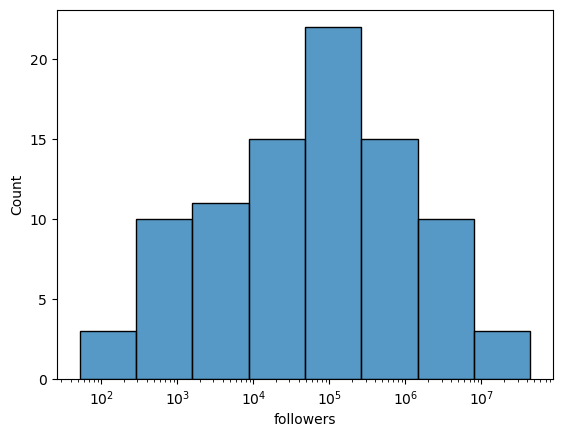

In [14]:
# distribution of follower count
sns.histplot(data = all_girl_groups, x = 'followers', log_scale = True)
plt.show()

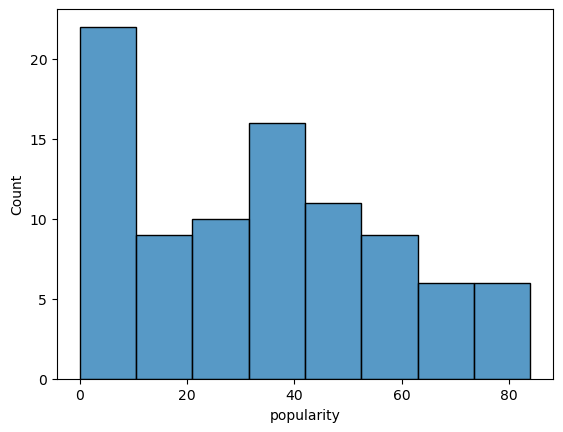

In [15]:
# popularity distribution
sns.histplot(data = all_girl_groups, x = 'popularity')
plt.show()

In [16]:
# who are the most popular groups?
all_girl_groups.sort_values(by = 'popularity', ascending = False)['spotify_name']

63       NewJeans
32      BLACKPINK
81          TWICE
43    FIFTY FIFTY
45       (G)I-DLE
         ...     
18       Peach A!
4          시크한아이들
8         Episode
27        Asome.D
7           ELFIN
Name: spotify_name, Length: 89, dtype: object

In [17]:
# what groups have the most followers?
all_girl_groups.sort_values(by = 'followers', ascending = False)['spotify_name']

32     BLACKPINK
81         TWICE
73    Red Velvet
61       MAMAMOO
45      (G)I-DLE
         ...    
12          해시태그
5      Chicangel
10          소녀세상
4         시크한아이들
7          ELFIN
Name: spotify_name, Length: 89, dtype: object

In [18]:
# create rankings based on popularity and follower count
all_girl_groups['follower_rank'] = all_girl_groups['followers'].rank(ascending = False, method = 'min')
all_girl_groups['popularity_rank'] = all_girl_groups['popularity'].rank(ascending = False, method = 'min')

# get average rank to balance out follower count and popularity
    # popularity: biased towards groups that have recent releases
    # follower count: biased towards older groups
    # sweet spot = groups with high follower counts that had a recent comeback
all_girl_groups['overall_rank'] = (all_girl_groups['popularity_rank'] + all_girl_groups['follower_rank']) / 2

In [19]:
# assign tiers based on ranking (not quartiles)
def get_top_n_tier(rank, tier_size = int(all_girl_groups.shape[0] / 4)):

    if rank <= tier_size:
        return('T1')
    elif (rank > tier_size) and (rank <= tier_size * 2):
        return('T2')
    elif (rank > tier_size * 2) and (rank <= tier_size * 3):
        return('T3')
    else:
        return('T4')

In [20]:
# assign tiers 
all_girl_groups['popularity_tier'] = all_girl_groups['popularity_rank'].apply(lambda x: get_top_n_tier(x))
all_girl_groups['follower_tier'] = all_girl_groups['follower_rank'].apply(lambda x: get_top_n_tier(x))
all_girl_groups['overall_tier'] = all_girl_groups['overall_rank'].apply(lambda x: get_top_n_tier(x))

In [21]:
# preview popularity tiers
all_girl_groups[['spotify_name', 'popularity', 'popularity_tier', 'popularity_rank']].sort_values(by = 'popularity_rank')

,spotify_name,popularity,popularity_tier,popularity_rank
63,NewJeans,84,T1,1.0
32,BLACKPINK,82,T1,2.0
81,TWICE,78,T1,3.0
43,FIFTY FIFTY,76,T1,4.0
58,LE SSERAFIM,75,T1,5.0
...,...,...,...,...
4,시크한아이들,0,T4,85.0
7,ELFIN,0,T4,85.0
8,Episode,0,T4,85.0
18,Peach A!,0,T4,85.0


In [22]:
# preview follower count tiers
all_girl_groups[['spotify_name', 'followers', 'follower_tier', 'follower_rank']].sort_values(by = 'follower_rank')

,spotify_name,followers,follower_tier,follower_rank
32,BLACKPINK,44348879,T1,1.0
81,TWICE,18555653,T1,2.0
73,Red Velvet,8659299,T1,3.0
61,MAMAMOO,7066744,T1,4.0
45,(G)I-DLE,6873777,T1,5.0
...,...,...,...,...
12,해시태그,477,T4,85.0
5,Chicangel,425,T4,86.0
10,소녀세상,229,T4,87.0
4,시크한아이들,106,T4,88.0


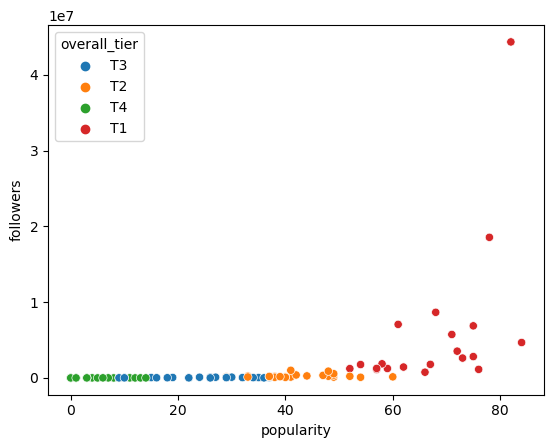

In [23]:
# scatterplot of popularity vs follower count
sns.scatterplot(data = all_girl_groups, x = 'popularity', y = 'followers', hue = 'overall_tier')
plt.show()

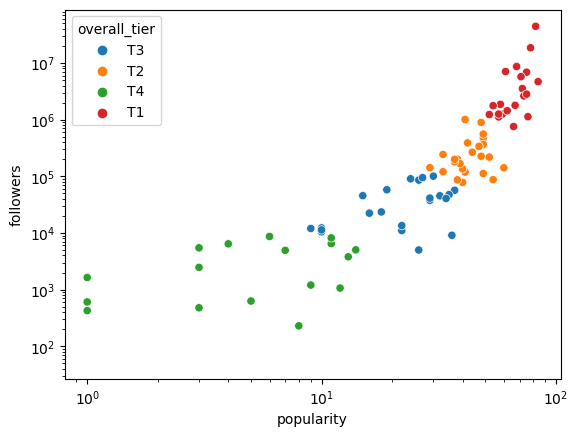

In [24]:
# scatterplot of popularity vs follower count -- log scale
sns.scatterplot(data = all_girl_groups, x = 'popularity', y = 'followers', hue = 'overall_tier')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [34]:
# which groups are in overall tier 1?
    ## T1 = top groups
    ## T2 = queendom puzzle 
    ## T3 = 100% girl group enthusiast
    ## T4 = nugupromoter
all_girl_groups[all_girl_groups['overall_tier'] == 'T4'].sort_values(by = ['overall_rank'])[['spotify_name', 'popularity_rank', 'follower_rank', 'overall_rank', 'popularity_tier', 'follower_tier', 'overall_tier']]

,spotify_name,popularity_rank,follower_rank,overall_rank,popularity_tier,follower_tier,overall_tier
22,SKYLE,66.0,67.0,66.5,T3,T4,T4
83,We;Na,63.0,71.0,67.0,T3,T4,T4
19,PRIMROSE,66.0,68.0,67.0,T3,T4,T4
71,Q6ix,64.0,74.0,69.0,T3,T4,T4
69,PRITTI-G,75.0,66.0,70.5,T4,T3,T4
46,GIRL CRUSH,65.0,78.0,71.5,T3,T4,T4
9,플로리아,77.0,69.0,73.0,T4,T4,T4
28,BADKIZ,74.0,73.0,73.5,T4,T4,T4
68,PoshGirls,78.0,70.0,74.0,T4,T4,T4
39,DIAWINGS,71.0,77.0,74.0,T4,T4,T4


In [27]:
# which groups are in a different overall tier than popularity or follower tiers?
all_girl_groups[(all_girl_groups['overall_tier'] != all_girl_groups['popularity_tier']) | (all_girl_groups['overall_tier'] != all_girl_groups['follower_tier'])][['spotify_name', 'popularity_tier', 'follower_tier', 'overall_tier']]

,spotify_name,popularity_tier,follower_tier,overall_tier
1,ALICE,T3,T2,T2
2,ODD EYE CIRCLE,T1,T3,T2
6,CSR,T2,T3,T3
13,Hi-L,T4,T3,T3
15,LIMELIGHT,T2,T3,T3
19,PRIMROSE,T3,T4,T4
22,SKYLE,T3,T4,T4
23,3YE,T3,T2,T3
29,BBGIRLS,T2,T3,T3
30,BEAUTY BOX,T4,T3,T3


In [35]:
# which groups have the largest discrepancy between follower count and popularity rank?
all_girl_groups['rank_diff'] = all_girl_groups['follower_rank'] - all_girl_groups['popularity_rank']
all_girl_groups[['spotify_name', 'rank_diff', 'follower_rank', 'popularity_rank', 'follower_tier', 'popularity_tier', 'overall_tier']].sort_values(by = 'rank_diff').tail(10)

,spotify_name,rank_diff,follower_rank,popularity_rank,follower_tier,popularity_tier,overall_tier
6,CSR,10.0,50.0,40.0,T3,T2,T3
48,H1-KEY,13.0,48.0,35.0,T3,T2,T2
46,GIRL CRUSH,13.0,78.0,65.0,T4,T3,T4
43,FIFTY FIFTY,14.0,18.0,4.0,T1,T1,T1
10,소녀세상,14.0,87.0,73.0,T4,T4,T4
16,MAVE:,17.0,41.0,24.0,T2,T2,T2
72,Queenz Eye,18.0,72.0,54.0,T4,T3,T3
55,KISS OF LIFE,22.0,37.0,15.0,T2,T1,T2
29,BBGIRLS,22.0,65.0,43.0,T3,T2,T3
2,ODD EYE CIRCLE,25.0,45.0,20.0,T3,T1,T2


In [29]:
# finally, which girl groups are the most popular overall?
all_girl_groups[['spotify_name', 'overall_rank']].sort_values(by = 'overall_rank')

,spotify_name,overall_rank
32,BLACKPINK,1.5
81,TWICE,2.5
63,NewJeans,4.0
45,(G)I-DLE,5.0
73,Red Velvet,6.5
...,...,...
5,Chicangel,83.5
18,Peach A!,84.0
27,Asome.D,84.5
4,시크한아이들,86.5


In [30]:
# save results to csv
all_girl_groups.to_csv('spotify_active_girl_group_data.csv')